In [131]:
import requests 
from bs4 import BeautifulSoup 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os
import warnings 

In [132]:
urls_list = ['https://inshorts.com/en/read/technology',
             'https://inshorts.com/en/read/sports',
             'https://inshorts.com/en/read/world',
            'https://inshorts.com/en/read/politics']

In [133]:
def datasetPrepare(urls_list):
    news_data = []
    for url in urls_list:
        news_category = url.split('/')[-1]
        
        data = requests.get(url)
        soup = BeautifulSoup(data.content, 'html.parser')
        articles = soup.find_all('div', itemtype="http://schema.org/NewsArticle")
        
        for article in articles:
            headline = article.find('span', itemprop="headline")
            body = article.find('div', itemprop="articleBody")
            if headline and body:
                news_data.append({
                    'news_headline': headline.get_text(strip=True),
                    'news_article': body.get_text(strip=True),
                    'news_category': news_category
                })
    
    df = pd.DataFrame(news_data)
    df = df[['news_headline', 'news_article', 'news_category']]
    return df

In [134]:
news_df = datasetPrepare(urls_list)
news_df.shape

(40, 3)

In [135]:
news_df.news_category.value_counts()

technology    10
sports        10
world         10
politics      10
Name: news_category, dtype: int64

In [136]:
news_df.head(2)

,news_headline,news_article,news_category
0,WhatsApp hasn't informed us about any plans to exit India: Govt,IT Minister Ashwini Vaishnaw said WhatsApp or its owner Meta haven't informed the government about any plans to shut down its services in India. He was asked in Parliament whether WhatsApp was planning to exit India over the government's directives to share user details. WhatsApp earlier told Delhi High Court that it'd exit India if told to break message encryption.,technology
1,"Google AI scores silver medal in Math Olympiad, misses gold by 1 point","Google DeepMind said two of their AI systems together solved four of the six problems in 2024 International Mathematical Olympiad. They achieved the same level as a human silver medalist in the competition for the first time. The AI systems scored 28 out of 42 possible points, missing the gold-medal threshold by one point as it starts at 29 points.",technology


In [137]:
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer
import re
import unicodedata

In [138]:
nlp = spacy.blank("en") #for english language 
nltk.download('stopwords') #stop words like is the 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saras\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [139]:
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')   #removing the words no and not because it can change the whole sentence 

In [140]:
# def remove_accented_chars(text):
#     text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
#     return text

In [141]:
# def strip_html_tags(text):
#     soup = BeautifulSoup(text, "html.parser")
#     stripped_text = soup.get_text()
#     return stripped_text

# strip_html_tags('<html><h2>Some important text</h2></html>')

In [142]:
# def remove_special_characters(text, remove_digits=False):
#     pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
#     text = re.sub(pattern, '', text)
#     return text

In [143]:
# def lemmatize_text(text):
#     text = nlp(text)
#     text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
#     return text

In [144]:
# def simple_stemmer(text):
#     ps = nltk.porter.PorterStemmer()
#     text = ' '.join([ps.stem(word) for word in text.split()])
#     return text

In [145]:
# def remove_stopwords(text, is_lower_case=False):
#     tokens = tokenizer.tokenize(text)
#     tokens = [token.strip() for token in tokens]
#     if is_lower_case:
#         filtered_tokens = [token for token in tokens if token not in stopword_list]
#     else:
#         filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
#     filtered_text = ' '.join(filtered_tokens)    
#     return filtered_text

In [146]:
# def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
#                      accented_char_removal=True, text_lower_case=True, 
#                      text_lemmatization=True, special_char_removal=True, 
#                      stopword_removal=True, remove_digits=True):
    
#     normalized_corpus = []
#     # normalize each document in the corpus
#     for doc in corpus:
#         # strip HTML
#         if html_stripping:
#             doc = strip_html_tags(doc)
#         # remove accented characters
#         if accented_char_removal:
#             doc = remove_accented_chars(doc)
#         # lowercase the text    
#         if text_lower_case:
#             doc = doc.lower()
#         # remove extra newlines
#         doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
#         # lemmatize text
#         if text_lemmatization:
#             doc = lemmatize_text(doc)
#         # remove special characters and\or digits    
#         if special_char_removal:
#             # insert spaces between special characters to isolate them    
#             special_char_pattern = re.compile(r'([{.(-)!}])')
#             doc = special_char_pattern.sub(" \\1 ", doc)
#             doc = remove_special_characters(doc, remove_digits=remove_digits)  
#         # remove extra whitespace
#         doc = re.sub(' +', ' ', doc)
#         # remove stopwords
#         if stopword_removal:
#             doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
#         normalized_corpus.append(doc)
        
#     return normalized_corpus

In [151]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saras\AppData\Roaming\nltk_data...


True

In [147]:
# news_df['full_text'] = news_df["news_headline"].map(str)+ '. ' + news_df["news_article"]

In [148]:
# news_df['clean_text'] = normalize_corpus(news_df['full_text'])
# norm_corpus = list(news_df['clean_text'])
# news_df.iloc[1][['full_text', 'clean_text']].to_dict()

In [153]:
import re

def strip_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

def remove_accented_chars(text):
    import unicodedata
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def lemmatize_text(text):
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    tokens = text.split()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z\s]' if not remove_digits else r'[^a-zA-z\s\d]'
    text = re.sub(pattern, '', text)
    return text

def remove_stopwords(text, is_lower_case=True):
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(filtered_tokens)

def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        print("Original:", doc)
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
            print("After HTML stripping:", doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
            print("After removing accented chars:", doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
            print("After lowercasing:", doc)
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ', doc)
        print("After removing newlines:", doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
            print("After lemmatization:", doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
            print("After removing special chars:", doc)
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        print("After removing extra whitespace:", doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            print("After removing stopwords:", doc)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus


In [ ]:
news_df['full_text'] = news_df["news_headline"].map(str)+ '. ' + news_df["news_article"]

In [164]:
news_df['clean_text'] = normalize_corpus(news_df['full_text'])
norm_corpus = list(news_df['clean_text'])
result = news_df.iloc[0][['full_text', 'clean_text']].to_dict()

Original: WhatsApp hasn't informed us about any plans to exit India: Govt. IT Minister Ashwini Vaishnaw said WhatsApp or its owner Meta haven't informed the government about any plans to shut down its services in India. He was asked in Parliament whether WhatsApp was planning to exit India over the government's directives to share user details. WhatsApp earlier told Delhi High Court that it'd exit India if told to break message encryption.
After HTML stripping: WhatsApp hasn't informed us about any plans to exit India: Govt. IT Minister Ashwini Vaishnaw said WhatsApp or its owner Meta haven't informed the government about any plans to shut down its services in India. He was asked in Parliament whether WhatsApp was planning to exit India over the government's directives to share user details. WhatsApp earlier told Delhi High Court that it'd exit India if told to break message encryption.
After removing accented chars: WhatsApp hasn't informed us about any plans to exit India: Govt. IT M

After removing stopwords: rashtrapati bhavans durbar hall ashok hall renamed durbar hall ashok hall rashtrapati bhavan renamed ganatantra mandap ashok mandap respectively term durbar hall reportedly replaced make ambience rashtrapati bhavan reflective indian cultural value ethos notably ganatantra mandap venue important ceremony like presentation national awards


In [165]:
print(f"Full Text: {result['full_text']}\n\nClean Text: {result['clean_text']}")

Full Text: WhatsApp hasn't informed us about any plans to exit India: Govt. IT Minister Ashwini Vaishnaw said WhatsApp or its owner Meta haven't informed the government about any plans to shut down its services in India. He was asked in Parliament whether WhatsApp was planning to exit India over the government's directives to share user details. WhatsApp earlier told Delhi High Court that it'd exit India if told to break message encryption.

Clean Text: whatsapp hasnt informed u plan exit india govt minister ashwini vaishnaw said whatsapp owner meta havent informed government plan shut service india wa asked parliament whether whatsapp wa planning exit india governments directive share user details whatsapp earlier told delhi high court itd exit india told break message encryption


In [166]:
news_df.head()

,news_headline,news_article,news_category,full_text,clean_text
0,WhatsApp hasn't informed us about any plans to exit India: Govt,IT Minister Ashwini Vaishnaw said WhatsApp or its owner Meta haven't informed the government about any plans to shut down its services in India. He was asked in Parliament whether WhatsApp was planning to exit India over the government's directives to share user details. WhatsApp earlier told Delhi High Court that it'd exit India if told to break message encryption.,technology,WhatsApp hasn't informed us about any plans to exit India: Govt. IT Minister Ashwini Vaishnaw said WhatsApp or its owner Meta haven't informed the government about any plans to shut down its services in India. He was asked in Parliament whether WhatsApp was planning to exit India over the government's directives to share user details. WhatsApp earlier told Delhi High Court that it'd exit India if told to break message encryption.,whatsapp hasnt informed u plan exit india govt minister ashwini vaishnaw said whatsapp owner meta havent informed government plan shut service india wa asked parliament whether whatsapp wa planning exit india governments directive share user details whatsapp earlier told delhi high court itd exit india told break message encryption
1,"Google AI scores silver medal in Math Olympiad, misses gold by 1 point","Google DeepMind said two of their AI systems together solved four of the six problems in 2024 International Mathematical Olympiad. They achieved the same level as a human silver medalist in the competition for the first time. The AI systems scored 28 out of 42 possible points, missing the gold-medal threshold by one point as it starts at 29 points.",technology,"Google AI scores silver medal in Math Olympiad, misses gold by 1 point. Google DeepMind said two of their AI systems together solved four of the six problems in 2024 International Mathematical Olympiad. They achieved the same level as a human silver medalist in the competition for the first time. The AI systems scored 28 out of 42 possible points, missing the gold-medal threshold by one point as it starts at 29 points.",google ai score silver medal math olympiad miss gold 1 point google deepmind said two ai system together solved four six problem 2024 international mathematical olympiad achieved level human silver medalist competition first time ai system scored 28 42 possible points missing goldmedal threshold one point start 29 points
2,Bill Gates' son-in-law Nayel Nassar to compete in Paris Olympics,"Microsoft's billionaire Co-founder Bill Gates' son-in-law Nayel Nassar is set to compete in Paris 2024 Olympics. The 33-year-old is a professional equestrian, who will represent Egypt in the equestrian jumping event. Nassar previously also participated in the Tokyo 2020 Olympics. He is married to Gates' eldest daughter Jennifer and the couple recently announced they are expecting a second child.",technology,"Bill Gates' son-in-law Nayel Nassar to compete in Paris Olympics. Microsoft's billionaire Co-founder Bill Gates' son-in-law Nayel Nassar is set to compete in Paris 2024 Olympics. The 33-year-old is a professional equestrian, who will represent Egypt in the equestrian jumping event. Nassar previously also participated in the Tokyo 2020 Olympics. He is married to Gates' eldest daughter Jennifer and the couple recently announced they are expecting a second child.",bill gates soninlaw nayel nassar compete paris olympics microsofts billionaire cofounder bill gates soninlaw nayel nassar set compete paris 2024 olympics 33yearold professional equestrian represent egypt equestrian jumping event nassar previously also participated tokyo 2020 olympics married gates eldest daughter jennifer couple recently announced expecting second child
3,97% of Windows sensors hit by outage back online: CrowdStrike CEO,"CrowdStrike CEO George Kurtz has announced that over 97% of Windows sensors affected by the outage were back online as of July 25. A faulty update b

In [167]:
news_df.to_csv('news_clean.csv', index=False, encoding='utf-8')

In [168]:
print("File saved in directory:", os.getcwd())

File saved in directory: C:\Users\saras


In [172]:
df2 = pd.read_csv('news_clean.csv')
df2.head()

,news_headline,news_article,news_category,full_text,clean_text
0,WhatsApp hasn't informed us about any plans to exit India: Govt,IT Minister Ashwini Vaishnaw said WhatsApp or its owner Meta haven't informed the government about any plans to shut down its services in India. He was asked in Parliament whether WhatsApp was planning to exit India over the government's directives to share user details. WhatsApp earlier told Delhi High Court that it'd exit India if told to break message encryption.,technology,WhatsApp hasn't informed us about any plans to exit India: Govt. IT Minister Ashwini Vaishnaw said WhatsApp or its owner Meta haven't informed the government about any plans to shut down its services in India. He was asked in Parliament whether WhatsApp was planning to exit India over the government's directives to share user details. WhatsApp earlier told Delhi High Court that it'd exit India if told to break message encryption.,whatsapp hasnt informed u plan exit india govt minister ashwini vaishnaw said whatsapp owner meta havent informed government plan shut service india wa asked parliament whether whatsapp wa planning exit india governments directive share user details whatsapp earlier told delhi high court itd exit india told break message encryption
1,"Google AI scores silver medal in Math Olympiad, misses gold by 1 point","Google DeepMind said two of their AI systems together solved four of the six problems in 2024 International Mathematical Olympiad. They achieved the same level as a human silver medalist in the competition for the first time. The AI systems scored 28 out of 42 possible points, missing the gold-medal threshold by one point as it starts at 29 points.",technology,"Google AI scores silver medal in Math Olympiad, misses gold by 1 point. Google DeepMind said two of their AI systems together solved four of the six problems in 2024 International Mathematical Olympiad. They achieved the same level as a human silver medalist in the competition for the first time. The AI systems scored 28 out of 42 possible points, missing the gold-medal threshold by one point as it starts at 29 points.",google ai score silver medal math olympiad miss gold 1 point google deepmind said two ai system together solved four six problem 2024 international mathematical olympiad achieved level human silver medalist competition first time ai system scored 28 42 possible points missing goldmedal threshold one point start 29 points
2,Bill Gates' son-in-law Nayel Nassar to compete in Paris Olympics,"Microsoft's billionaire Co-founder Bill Gates' son-in-law Nayel Nassar is set to compete in Paris 2024 Olympics. The 33-year-old is a professional equestrian, who will represent Egypt in the equestrian jumping event. Nassar previously also participated in the Tokyo 2020 Olympics. He is married to Gates' eldest daughter Jennifer and the couple recently announced they are expecting a second child.",technology,"Bill Gates' son-in-law Nayel Nassar to compete in Paris Olympics. Microsoft's billionaire Co-founder Bill Gates' son-in-law Nayel Nassar is set to compete in Paris 2024 Olympics. The 33-year-old is a professional equestrian, who will represent Egypt in the equestrian jumping event. Nassar previously also participated in the Tokyo 2020 Olympics. He is married to Gates' eldest daughter Jennifer and the couple recently announced they are expecting a second child.",bill gates soninlaw nayel nassar compete paris olympics microsofts billionaire cofounder bill gates soninlaw nayel nassar set compete paris 2024 olympics 33yearold professional equestrian represent egypt equestrian jumping event nassar previously also participated tokyo 2020 olympics married gates eldest daughter jennifer couple recently announced expecting second child
3,97% of Windows sensors hit by outage back online: CrowdStrike CEO,"CrowdStrike CEO George Kurtz has announced that over 97% of Windows sensors affected by the outage were back online as of July 25. A faulty update b

In [182]:
nlp = spacy.load("en_core_web_sm")
clean_text = df2.loc[1, 'clean_text']
doc = nlp(clean_text)
spacy_pos_tagged = [(token.text, token.tag_, token.pos_) for token in doc]
pos_df = pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type'])
print(pos_df.head(10))

       Word POS tag Tag type
0    google     NNP    PROPN
1        ai     VBP     VERB
2     score      NN     NOUN
3    silver      JJ      ADJ
4     medal      NN     NOUN
5      math      NN     NOUN
6  olympiad      NN     NOUN
7      miss      VB     VERB
8      gold      NN     NOUN
9         1      CD      NUM


In [191]:
clean_text = df2.loc[1, 'clean_text']
print(clean_text)

google ai score silver medal math olympiad miss gold 1 point google deepmind said two ai system together solved four six problem 2024 international mathematical olympiad achieved level human silver medalist competition first time ai system scored 28 42 possible points missing goldmedal threshold one point start 29 points


In [192]:
sentence_nlp = nlp(clean_text)
print(sentence_nlp)

google ai score silver medal math olympiad miss gold 1 point google deepmind said two ai system together solved four six problem 2024 international mathematical olympiad achieved level human silver medalist competition first time ai system scored 28 42 possible points missing goldmedal threshold one point start 29 points


In [194]:
print([(i, i.ent_type_) for i in sentence_nlp if i.ent_type_])

[(google, 'ORG'), (1, 'CARDINAL'), (two, 'CARDINAL'), (four, 'CARDINAL'), (six, 'CARDINAL'), (2024, 'DATE'), (first, 'ORDINAL'), (28, 'CARDINAL'), (42, 'CARDINAL'), (one, 'CARDINAL'), (29, 'CARDINAL')]


In [207]:
def extract_named_entities(corpus):
    named_entities = []
    for sentence in corpus:
        temp_entity_name = ''
        temp_named_entity = None
        sentence = nlp(sentence)
        for word in sentence:
            term = word.text 
            tag = word.ent_type_
            if tag:
                temp_entity_name = ' '.join([temp_entity_name, term]).strip()
                temp_named_entity = (temp_entity_name, tag)
            else:
                if temp_named_entity:
                    named_entities.append(temp_named_entity)
                    temp_entity_name = ''
                    temp_named_entity = None
    return named_entities

In [205]:
top_entities = (entity_frame.groupby(by=['Entity Name', 'Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Name,first,2024,india,congress,paris,indian,sri lanka,3,1st,six,french,kangana,16,donald trump,60000person 50
Entity Type,ORDINAL,DATE,GPE,ORG,GPE,NORP,GPE,CARDINAL,ORDINAL,CARDINAL,NORP,PERSON,CARDINAL,PERSON,CARDINAL
Frequency,11,10,10,5,4,3,3,3,3,3,3,3,3,3,2


In [206]:
top_entities = (entity_frame.groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10
Entity Type,CARDINAL,PERSON,GPE,ORG,DATE,NORP,ORDINAL,QUANTITY,FAC,MONEY,TIME
Frequency,52,43,33,26,25,21,18,4,2,2,2


In [212]:
df2.head()

,news_headline,news_article,news_category,full_text,clean_text,named_entities
0,WhatsApp hasn't informed us about any plans to exit India: Govt,IT Minister Ashwini Vaishnaw said WhatsApp or its owner Meta haven't informed the government about any plans to shut down its services in India. He was asked in Parliament whether WhatsApp was planning to exit India over the government's directives to share user details. WhatsApp earlier told Delhi High Court that it'd exit India if told to break message encryption.,technology,WhatsApp hasn't informed us about any plans to exit India: Govt. IT Minister Ashwini Vaishnaw said WhatsApp or its owner Meta haven't informed the government about any plans to shut down its services in India. He was asked in Parliament whether WhatsApp was planning to exit India over the government's directives to share user details. WhatsApp earlier told Delhi High Court that it'd exit India if told to break message encryption.,whatsapp hasnt informed u plan exit india govt minister ashwini vaishnaw said whatsapp owner meta havent informed government plan shut service india wa asked parliament whether whatsapp wa planning exit india governments directive share user details whatsapp earlier told delhi high court itd exit india told break message encryption,"[(india, GPE), (ashwini vaishnaw, PERSON), (meta, PERSON), (india, GPE), (india, GPE), (delhi high court, ORG), (india, GPE)]"
1,"Google AI scores silver medal in Math Olympiad, misses gold by 1 point","Google DeepMind said two of their AI systems together solved four of the six problems in 2024 International Mathematical Olympiad. They achieved the same level as a human silver medalist in the competition for the first time. The AI systems scored 28 out of 42 possible points, missing the gold-medal threshold by one point as it starts at 29 points.",technology,"Google AI scores silver medal in Math Olympiad, misses gold by 1 point. Google DeepMind said two of their AI systems together solved four of the six problems in 2024 International Mathematical Olympiad. They achieved the same level as a human silver medalist in the competition for the first time. The AI systems scored 28 out of 42 possible points, missing the gold-medal threshold by one point as it starts at 29 points.",google ai score silver medal math olympiad miss gold 1 point google deepmind said two ai system together solved four six problem 2024 international mathematical olympiad achieved level human silver medalist competition first time ai system scored 28 42 possible points missing goldmedal threshold one point start 29 points,"[(google, ORG), (1, CARDINAL), (two, CARDINAL), (four six, CARDINAL), (2024, DATE), (first, ORDINAL), (28 42, CARDINAL), (one, CARDINAL), (29, CARDINAL)]"
2,Bill Gates' son-in-law Nayel Nassar to compete in Paris Olympics,"Microsoft's billionaire Co-founder Bill Gates' son-in-law Nayel Nassar is set to compete in Paris 2024 Olympics. The 33-year-old is a professional equestrian, who will represent Egypt in the equestrian jumping event. Nassar previously also participated in the Tokyo 2020 Olympics. He is married to Gates' eldest daughter Jennifer and the couple recently announced they are expecting a second child.",technology,"Bill Gates' son-in-law Nayel Nassar to compete in Paris Olympics. Microsoft's billionaire Co-founder Bill Gates' son-in-law Nayel Nassar is set to compete in Paris 2024 Olympics. The 33-year-old is a professional equestrian, who will represent Egypt in the equestrian jumping event. Nassar previously also participated in the Tokyo 2020 Olympics. He is married to Gates' eldest daughter Jennifer and the couple recently announced they are expecting a second child.",bill gates soninlaw nayel nassar compete paris olympics microsofts billionaire cofounder bill gates soninlaw nayel nassar set compete paris 2024 olympics 33yearold professional equestrian represent egypt equestrian jumping event nassar previously also participated tokyo 2020 olympics marrie

In [215]:
from afinn import Afinn
afinn = Afinn()

df2['sentiment_score'] = [afinn.score(i) for i in df2['clean_text']]
df2[['clean_text', 'sentiment_score']].head()

,clean_text,sentiment_score
0,whatsapp hasnt informed u plan exit india govt minister ashwini vaishnaw said whatsapp owner meta havent informed government plan shut service india wa asked parliament whether whatsapp wa planning exit india governments directive share user details whatsapp earlier told delhi high court itd exit india told break message encryption,1.0
1,google ai score silver medal math olympiad miss gold 1 point google deepmind said two ai system together solved four six problem 2024 international mathematical olympiad achieved level human silver medalist competition first time ai system scored 28 42 possible points missing goldmedal threshold one point start 29 points,0.0
2,bill gates soninlaw nayel nassar compete paris olympics microsofts billionaire cofounder bill gates soninlaw nayel nassar set compete paris 2024 olympics 33yearold professional equestrian represent egypt equestrian jumping event nassar previously also participated tokyo 2020 olympics married gates eldest daughter jennifer couple recently announced expecting second child,0.0
3,97 window sensor hit outage back online crowdstrike ceo crowdstrike ceo george kurtz ha announced 97 window sensor affected outage back online july 25 faulty update cybersecurity firm caused global outage last week affected 8 5 million window devices remain committed restoring every impacted system kurtz stated,-4.0
4,woman loses 3 crore close friend steal crypto phone delhi woman delhi lost 3 crore close friend stole 6 bitcoins phones crypto wallet wa travelling abroad accused ha arrested police said committed fraud friend wa travelling flight knowing phone would switched 78 hour used tumbler avoid money trail,-11.0


In [217]:
df2.groupby(by=['news_category']).describe()

sentiment_score                                            
                        count mean       std   min   25%  50%   75%   max
news_category                                                            
politics                 10.0  0.6  4.993329  -6.0 -3.50  1.0  2.75   9.0
sports                   10.0  2.7  7.071853  -4.0  0.00  0.0  4.00  21.0
technology               10.0 -0.3  4.967673 -11.0 -0.75  0.5  1.00   9.0
world                    10.0 -2.3  7.379401 -19.0 -6.00  0.5  1.75   8.0

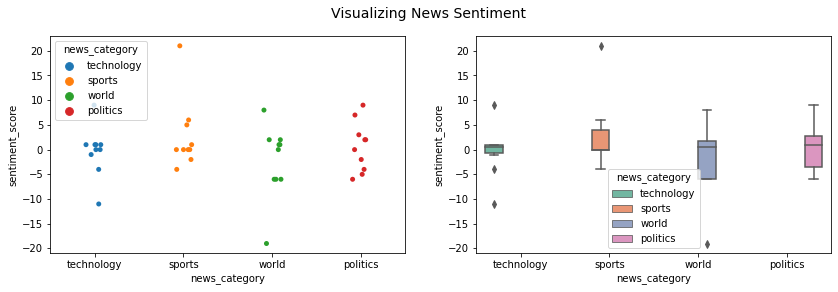

In [219]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='news_category', y="sentiment_score",  hue='news_category', data=df2, ax=ax1)
bp = sns.boxplot(x='news_category', y="sentiment_score", hue='news_category', data=df2, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing News Sentiment', fontsize=14)

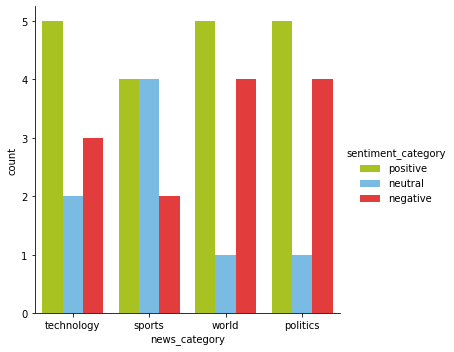

In [228]:
fc = sns.catplot(x="news_category", hue="sentiment_category", 
                 data=df2, kind="count",
                 palette={"negative": "#FE2020", 
                          "positive": "#BADD07",
                          "neutral": "#68BFF5"})

plt.show()